In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, QuantileTransformer
from sklearn.impute import SimpleImputer
import numpy as np

In [162]:
import sys
import os
from os.path import dirname
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
sys.path.append(dirname('../src'))
from src.utils import utils
data = utils.load_df("../Data/feature_eng.pkl")
data.head(5)

,cx_curp,ventana,sexo,sum_num_consultas,avg_num_consultas_by_year,dm,hta,renal,año_dx_dm,año_dx_hta,...,METILXANTINAS,num_METILXANTINAS,avg_METILXANTINAS,VARIOS,num_VARIOS,avg_VARIOS,VITAMINICOS,num_VITAMINICOS,avg_VITAMINICOS,label
0,AADV5603014KS44QC1,1,M,25,12.5,0,0,0,1999,1999,...,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0
1,AADV5603014KS44QC1,2,M,24,12,0,0,0,1999,1999,...,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0
2,AADV5603014KS44QC1,3,M,21,10.5,0,0,0,1999,1999,...,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0
3,AADV5603014KS44QC1,4,M,20,10,0,0,0,1999,1999,...,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,1
4,AEDJ750301XGAEGRC1,1,M,4,2,0,0,0,NaN,NaN,...,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0


<AxesSubplot:>

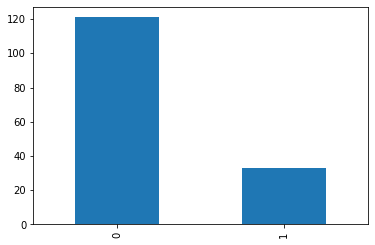

In [163]:
data['label'].value_counts().plot.bar()

In [164]:
data[data['sum_num_consultas']==0]

,cx_curp,ventana,sexo,sum_num_consultas,avg_num_consultas_by_year,dm,hta,renal,año_dx_dm,año_dx_hta,...,METILXANTINAS,num_METILXANTINAS,avg_METILXANTINAS,VARIOS,num_VARIOS,avg_VARIOS,VITAMINICOS,num_VITAMINICOS,avg_VITAMINICOS,label
6,AEDJ750301XGAEGRC1,3,,0,0,0,0,0,NaN,NaN,...,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0
27,COPI690401V91QCRC2,5,,0,0,0,0,0,NaN,NaN,...,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0
28,COPI690401V91QCRC2,6,,0,0,0,0,0,NaN,NaN,...,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0
29,COPI690401V91QCRC2,7,,0,0,0,0,0,NaN,NaN,...,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0
56,GAMP640301UJL5SEE1,7,,0,0,0,0,0,NaN,NaN,...,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0
57,GAMP640301UJL5SEE1,8,,0,0,0,0,0,NaN,NaN,...,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,1
65,GUSJ5712286XUN73A2,2,,0,0,0,0,0,NaN,NaN,...,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0
66,GUSJ5712286XUN73A2,3,,0,0,0,0,0,NaN,NaN,...,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0
67,GUSJ5712286XUN73A2,4,,0,0,0,0,0,NaN,NaN,...,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0
68,GUSJ5712286XUN73A2,5,,0,0,0,0,0,NaN,NaN,...,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,1


- Eliminando filas que no aportan información

In [165]:
data = data[data['sum_num_consultas']>0]
data = data.reset_index()
data = data.drop(columns=['index'])
data

,cx_curp,ventana,sexo,sum_num_consultas,avg_num_consultas_by_year,dm,hta,renal,año_dx_dm,año_dx_hta,...,METILXANTINAS,num_METILXANTINAS,avg_METILXANTINAS,VARIOS,num_VARIOS,avg_VARIOS,VITAMINICOS,num_VITAMINICOS,avg_VITAMINICOS,label
0,AADV5603014KS44QC1,1,M,25,12.5,0,0,0,1999,1999,...,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0
1,AADV5603014KS44QC1,2,M,24,12,0,0,0,1999,1999,...,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0
2,AADV5603014KS44QC1,3,M,21,10.5,0,0,0,1999,1999,...,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0
3,AADV5603014KS44QC1,4,M,20,10,0,0,0,1999,1999,...,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,1
4,AEDJ750301XGAEGRC1,1,M,4,2,0,0,0,NaN,NaN,...,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0
5,AEDJ750301XGAEGRC1,2,M,2,1,0,0,0,NaN,NaN,...,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0
6,AEDJ750301XGAEGRC1,4,M,1,0.5,0,0,0,NaN,NaN,...,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,1
7,BOLM631201LV35XPC1,1,F,16,8,0,0,0,NaN,NaN,...,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0
8,BOLM631201LV35XPC1,2,F,12,6,0,0,0,NaN,NaN,...,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0
9,BOLM631201LV35XPC1,3,F,13,6.5,1,0,0,2000,2009,...,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0


<AxesSubplot:>

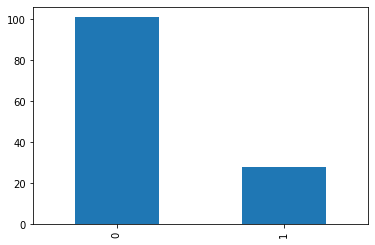

In [166]:
data['label'].value_counts().plot.bar()

- Eliminando columnas que no aportan información

In [167]:
subset_df = data.loc[:, data.isnull().all()]
col_null = list(subset_df.columns)
col_null

['num_med_ldl',
 'avg_ldl',
 'min_ldl',
 'max_ldl',
 'num_med_plaquetas',
 'avg_plaquetas',
 'min_plaquetas',
 'max_plaquetas',
 'num_med_tuberculosis',
 'avg_tuberculosis',
 'num_med_ot_enf_bacterianas',
 'avg_ot_enf_bacterianas',
 'num_med_inf_trans_pred_sexual',
 'avg_inf_trans_pred_sexual',
 'num_med_rickettsiosis_y_ot_enf__protozoarios',
 'avg_rickettsiosis_y_ot_enf__protozoarios',
 'num_med_tumores_malig_labio_bucal_faringe',
 'avg_tumores_malig_labio_bucal_faringe',
 'num_med_tumores_malig_organos',
 'avg_tumores_malig_organos',
 'num_med_tumores_malig_org_genitourinarios',
 'avg_tumores_malig_org_genitourinarios',
 'num_med_tumores_malig_otros_sitios_ne',
 'avg_tumores_malig_otros_sitios_ne',
 'num_med_tumores_malig_tejido_linf_org_hematop',
 'avg_tumores_malig_tejido_linf_org_hematop',
 'num_med_tumores_comp_incierto_desc',
 'avg_tumores_comp_incierto_desc',
 'num_med_enf_sangre_org_hematop',
 'avg_enf_sangre_org_hematop',
 'num_med_desnutricion_ot_deficiencias',
 'avg_desnutr

In [168]:
data.drop(col_null, axis=1, inplace=True)
list(data.columns)

['cx_curp',
 'ventana',
 'sexo',
 'sum_num_consultas',
 'avg_num_consultas_by_year',
 'dm',
 'hta',
 'renal',
 'año_dx_dm',
 'año_dx_hta',
 'imc_range',
 'dm_años_flt',
 'dm_años_int',
 'hta_años_flt',
 'hta_años_int',
 'renal_años_flt',
 'renal_años_int',
 'hta_dx_años_flt',
 'hta_dx_años_int',
 'edad_range',
 'epoca_nac',
 'num_med',
 'avg_num_med',
 'min_num_med',
 'max_num_med',
 'preglucosa',
 'num_med_preglucosa',
 'avg_preglucosa',
 'min_preglucosa',
 'max_preglucosa',
 'postglucosa',
 'num_med_postglucosa',
 'avg_postglucosa',
 'min_postglucosa',
 'max_postglucosa',
 'colesterol',
 'num_med_colesterol',
 'avg_colesterol',
 'min_colesterol',
 'max_colesterol',
 'trigliceridos',
 'num_med_trigliceridos',
 'avg_trigliceridos',
 'min_trigliceridos',
 'max_trigliceridos',
 'hdl',
 'num_med_hdl',
 'avg_hdl',
 'min_hdl',
 'max_hdl',
 'ldl',
 'presion_arterial',
 'num_med_presion_a',
 'avg_sistolica_a',
 'min_sistolica_a',
 'max_sistolica_a',
 'avg_diastolica_a',
 'min_diastolica_a',
 

In [169]:
display(data[['imc_range']])
data = data.loc[:,~data.columns.duplicated()].copy()
data[['imc_range']]

,imc_range,imc_range
0,Obesidad Grado 1,Obesidad Grado 1
1,Obesidad Grado 1,Obesidad Grado 1
2,Obesidad Grado 1,Obesidad Grado 1
3,Obesidad Grado 1,Obesidad Grado 1
4,Obesidad Grado 2,Obesidad Grado 2
5,Obesidad Grado 2,Obesidad Grado 2
6,Obesidad Grado 2,Obesidad Grado 2
7,Sobrepeso,Sobrepeso
8,Sobrepeso,Sobrepeso
9,Sobrepeso,Sobrepeso


,imc_range
0,Obesidad Grado 1
1,Obesidad Grado 1
2,Obesidad Grado 1
3,Obesidad Grado 1
4,Obesidad Grado 2
5,Obesidad Grado 2
6,Obesidad Grado 2
7,Sobrepeso
8,Sobrepeso
9,Sobrepeso


In [170]:
data.shape

(129, 1166)

In [171]:
data.loc[(data['imc_range'] == 'Bajo peso'), 'imc_range'] = 1#'Bajo peso'
data.loc[(data['imc_range'] == 'Peso normal'), 'imc_range'] = 2#'
data.loc[(data['imc_range'] == 'Sobrepeso'), 'imc_range'] = 3#
data.loc[(data['imc_range'] == 'Obesidad Grado 1')|\
       (data['imc_range'] == 'Obesidad Grado 2')|\
       (data['imc_range'] == 'Obesidad Grado 3'), 'imc_range'] = 4#'

In [172]:
data[pd.isna(data['imc_range'])]

,cx_curp,ventana,sexo,sum_num_consultas,avg_num_consultas_by_year,dm,hta,renal,año_dx_dm,año_dx_hta,...,FARMACOS_UTILIZADOS_EN_PSIQUIATRIA,FORMULAS_NUTRICIONALES_COMPLETAS,HIPOLIPEMIANTES,HORMONALES,METILXANTINAS,VARIOS,VITAMINICOS,num_VITAMINICOS,avg_VITAMINICOS,label
91,PAGJ690411WZ0YDRC1,3,M,1,0.5,1,0,0,NaN,NaN,...,0,0,0,0,0,0,0,NaN,NaN,0
92,PAGJ690411WZ0YDRC1,4,M,1,0.5,1,0,0,NaN,NaN,...,0,0,0,0,0,0,0,NaN,NaN,0


In [173]:
data[data['cx_curp']=='PAGJ690411WZ0YDRC1'][['ventana','imc_range']]

,ventana,imc_range
90,1,4
91,3,NaN
92,4,NaN
93,12,3


In [174]:
#data['imc_range'] = data['imc_range'].fillna('Sin dato')
#data['sexo'] = data['sexo'].fillna('Sin dato')
data.loc[(data['sexo'] == 'M'), 'sexo'] = 1
data.loc[(data['sexo'] == 'F'), 'sexo'] = 2

In [175]:
#df_st = data[['sexo','imc_range']]
#display(df_st.head(5))
#df1 = data.drop(['sexo','imc_range'], axis=1)
#display(df1.head(5))

In [176]:
data[pd.isna(data['label'])][['cx_curp','ventana','label']]

,cx_curp,ventana,label


In [177]:
cx_curp = data['cx_curp'] 
data = data.drop(['cx_curp'], axis=1)

In [178]:
data

,ventana,sexo,sum_num_consultas,avg_num_consultas_by_year,dm,hta,renal,año_dx_dm,año_dx_hta,imc_range,...,FARMACOS_UTILIZADOS_EN_PSIQUIATRIA,FORMULAS_NUTRICIONALES_COMPLETAS,HIPOLIPEMIANTES,HORMONALES,METILXANTINAS,VARIOS,VITAMINICOS,num_VITAMINICOS,avg_VITAMINICOS,label
0,1,1,25,12.5,0,0,0,1999,1999,4,...,0,0,0,0,0,0,0,NaN,NaN,0
1,2,1,24,12,0,0,0,1999,1999,4,...,0,0,0,0,0,0,0,NaN,NaN,0
2,3,1,21,10.5,0,0,0,1999,1999,4,...,0,0,0,0,0,0,0,NaN,NaN,0
3,4,1,20,10,0,0,0,1999,1999,4,...,0,0,0,0,0,0,0,NaN,NaN,1
4,1,1,4,2,0,0,0,NaN,NaN,4,...,0,0,0,0,0,0,0,NaN,NaN,0
5,2,1,2,1,0,0,0,NaN,NaN,4,...,0,0,0,0,0,0,0,NaN,NaN,0
6,4,1,1,0.5,0,0,0,NaN,NaN,4,...,0,0,0,0,0,0,0,NaN,NaN,1
7,1,2,16,8,0,0,0,NaN,NaN,3,...,0,0,0,0,0,0,0,NaN,NaN,0
8,2,2,12,6,0,0,0,NaN,NaN,3,...,0,0,0,0,0,0,0,NaN,NaN,0
9,3,2,13,6.5,1,0,0,2000,2009,3,...,0,0,0,0,0,0,0,NaN,NaN,0


In [179]:
data[pd.isna(data['label'])][['ventana','label']]

,ventana,label


In [180]:
data.shape

(129, 1165)

### Imputaciones

In [181]:
col = list(data.columns)
col

['ventana',
 'sexo',
 'sum_num_consultas',
 'avg_num_consultas_by_year',
 'dm',
 'hta',
 'renal',
 'año_dx_dm',
 'año_dx_hta',
 'imc_range',
 'dm_años_flt',
 'dm_años_int',
 'hta_años_flt',
 'hta_años_int',
 'renal_años_flt',
 'renal_años_int',
 'hta_dx_años_flt',
 'hta_dx_años_int',
 'edad_range',
 'epoca_nac',
 'num_med',
 'avg_num_med',
 'min_num_med',
 'max_num_med',
 'preglucosa',
 'num_med_preglucosa',
 'avg_preglucosa',
 'min_preglucosa',
 'max_preglucosa',
 'postglucosa',
 'num_med_postglucosa',
 'avg_postglucosa',
 'min_postglucosa',
 'max_postglucosa',
 'colesterol',
 'num_med_colesterol',
 'avg_colesterol',
 'min_colesterol',
 'max_colesterol',
 'trigliceridos',
 'num_med_trigliceridos',
 'avg_trigliceridos',
 'min_trigliceridos',
 'max_trigliceridos',
 'hdl',
 'num_med_hdl',
 'avg_hdl',
 'min_hdl',
 'max_hdl',
 'ldl',
 'presion_arterial',
 'num_med_presion_a',
 'avg_sistolica_a',
 'min_sistolica_a',
 'max_sistolica_a',
 'avg_diastolica_a',
 'min_diastolica_a',
 'max_diastol

In [182]:
# Imputation
my_imputer = SimpleImputer()
d_inp = pd.DataFrame(my_imputer.fit_transform(data))
d_inp

,0,1,2,3,4,5,6,7,8,9,...,1155,1156,1157,1158,1159,1160,1161,1162,1163,1164
0,1.0,1.0,25.0,12.5,0.0,0.0,0.0,1999.000000,1999.000000,4.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.583333,1.291667,0.0
1,2.0,1.0,24.0,12.0,0.0,0.0,0.0,1999.000000,1999.000000,4.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.583333,1.291667,0.0
2,3.0,1.0,21.0,10.5,0.0,0.0,0.0,1999.000000,1999.000000,4.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.583333,1.291667,0.0
3,4.0,1.0,20.0,10.0,0.0,0.0,0.0,1999.000000,1999.000000,4.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.583333,1.291667,1.0
4,1.0,1.0,4.0,2.0,0.0,0.0,0.0,2001.333333,2006.235294,4.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.583333,1.291667,0.0
5,2.0,1.0,2.0,1.0,0.0,0.0,0.0,2001.333333,2006.235294,4.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.583333,1.291667,0.0
6,4.0,1.0,1.0,0.5,0.0,0.0,0.0,2001.333333,2006.235294,4.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.583333,1.291667,1.0
7,1.0,2.0,16.0,8.0,0.0,0.0,0.0,2001.333333,2006.235294,3.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.583333,1.291667,0.0
8,2.0,2.0,12.0,6.0,0.0,0.0,0.0,2001.333333,2006.235294,3.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.583333,1.291667,0.0
9,3.0,2.0,13.0,6.5,1.0,0.0,0.0,2000.000000,2009.000000,3.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.583333,1.291667,0.0


In [183]:
d_inp.shape

(129, 1165)

In [184]:
d_inp.columns = col
d_inp

,ventana,sexo,sum_num_consultas,avg_num_consultas_by_year,dm,hta,renal,año_dx_dm,año_dx_hta,imc_range,...,FARMACOS_UTILIZADOS_EN_PSIQUIATRIA,FORMULAS_NUTRICIONALES_COMPLETAS,HIPOLIPEMIANTES,HORMONALES,METILXANTINAS,VARIOS,VITAMINICOS,num_VITAMINICOS,avg_VITAMINICOS,label
0,1.0,1.0,25.0,12.5,0.0,0.0,0.0,1999.000000,1999.000000,4.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.583333,1.291667,0.0
1,2.0,1.0,24.0,12.0,0.0,0.0,0.0,1999.000000,1999.000000,4.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.583333,1.291667,0.0
2,3.0,1.0,21.0,10.5,0.0,0.0,0.0,1999.000000,1999.000000,4.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.583333,1.291667,0.0
3,4.0,1.0,20.0,10.0,0.0,0.0,0.0,1999.000000,1999.000000,4.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.583333,1.291667,1.0
4,1.0,1.0,4.0,2.0,0.0,0.0,0.0,2001.333333,2006.235294,4.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.583333,1.291667,0.0
5,2.0,1.0,2.0,1.0,0.0,0.0,0.0,2001.333333,2006.235294,4.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.583333,1.291667,0.0
6,4.0,1.0,1.0,0.5,0.0,0.0,0.0,2001.333333,2006.235294,4.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.583333,1.291667,1.0
7,1.0,2.0,16.0,8.0,0.0,0.0,0.0,2001.333333,2006.235294,3.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.583333,1.291667,0.0
8,2.0,2.0,12.0,6.0,0.0,0.0,0.0,2001.333333,2006.235294,3.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.583333,1.291667,0.0
9,3.0,2.0,13.0,6.5,1.0,0.0,0.0,2000.000000,2009.000000,3.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.583333,1.291667,0.0


In [185]:
#df_st

In [186]:
#df = pd.merge(d_inp, df_st, left_index=True, right_index=True)  
df = d_inp.copy()
df

,ventana,sexo,sum_num_consultas,avg_num_consultas_by_year,dm,hta,renal,año_dx_dm,año_dx_hta,imc_range,...,FARMACOS_UTILIZADOS_EN_PSIQUIATRIA,FORMULAS_NUTRICIONALES_COMPLETAS,HIPOLIPEMIANTES,HORMONALES,METILXANTINAS,VARIOS,VITAMINICOS,num_VITAMINICOS,avg_VITAMINICOS,label
0,1.0,1.0,25.0,12.5,0.0,0.0,0.0,1999.000000,1999.000000,4.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.583333,1.291667,0.0
1,2.0,1.0,24.0,12.0,0.0,0.0,0.0,1999.000000,1999.000000,4.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.583333,1.291667,0.0
2,3.0,1.0,21.0,10.5,0.0,0.0,0.0,1999.000000,1999.000000,4.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.583333,1.291667,0.0
3,4.0,1.0,20.0,10.0,0.0,0.0,0.0,1999.000000,1999.000000,4.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.583333,1.291667,1.0
4,1.0,1.0,4.0,2.0,0.0,0.0,0.0,2001.333333,2006.235294,4.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.583333,1.291667,0.0
5,2.0,1.0,2.0,1.0,0.0,0.0,0.0,2001.333333,2006.235294,4.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.583333,1.291667,0.0
6,4.0,1.0,1.0,0.5,0.0,0.0,0.0,2001.333333,2006.235294,4.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.583333,1.291667,1.0
7,1.0,2.0,16.0,8.0,0.0,0.0,0.0,2001.333333,2006.235294,3.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.583333,1.291667,0.0
8,2.0,2.0,12.0,6.0,0.0,0.0,0.0,2001.333333,2006.235294,3.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.583333,1.291667,0.0
9,3.0,2.0,13.0,6.5,1.0,0.0,0.0,2000.000000,2009.000000,3.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.583333,1.291667,0.0


In [187]:
X = df.loc[:, df.columns != 'label']
Y = df[["label"]]

In [188]:
print(X.shape)
print(Y.shape)

(129, 1164)
(129, 1)


In [189]:
Y

,label
0,0.0
1,0.0
2,0.0
3,1.0
4,0.0
5,0.0
6,1.0
7,0.0
8,0.0
9,0.0


In [190]:
#transformers = [('genero', OneHotEncoder(),['sexo'])]
#col_trans_sexo = ColumnTransformer(transformers, remainder="drop", n_jobs=-1, verbose=True)
##este no se corre mas que una sola vez porque es el que calibra
#col_trans_sexo.fit(df)
#col_trans_sexo.get_feature_names()

In [191]:
#sexo_transformada = col_trans_sexo.transform(df)
#df_sexo = pd.DataFrame(sexo_transformada)
#df_sexo.columns = col_trans_sexo.get_feature_names()
#df_sexo.head()
#df_sexo.replace(np.nan,0)

In [192]:
#transformers = [('imc_r', OneHotEncoder(),['imc_range'])]
#col_trans_imc_range = ColumnTransformer(transformers, remainder="drop", n_jobs=-1, verbose=True)
##este no se corre mas que una sola vez porque es el que calibra
#col_trans_imc_range.fit(df)
#col_trans_imc_range.get_feature_names()

In [193]:
#imc_range_transformada = col_trans_imc_range.transform(df)
#df_imc_range = pd.DataFrame(imc_range_transformada.toarray())
#df_imc_range.columns = col_trans_imc_range.get_feature_names()
#df_imc_range.head()
#df_imc_range.replace(np.nan,0)

In [194]:
print(X.shape)
#print(df_imc_range.shape)
#print(df_sexo.shape)

(129, 1164)


- Uniendo onehotencoder

In [195]:
#X = pd.concat([X, df_sexo, df_imc_range], axis= 1)
#X.shape

In [196]:
X.dtypes

ventana                                                           float64
sexo                                                              float64
sum_num_consultas                                                 float64
avg_num_consultas_by_year                                         float64
dm                                                                float64
hta                                                               float64
renal                                                             float64
año_dx_dm                                                         float64
año_dx_hta                                                        float64
imc_range                                                         float64
dm_años_flt                                                       float64
dm_años_int                                                       float64
hta_años_flt                                                      float64
hta_años_int                          

In [197]:
print(Y.size)
Y = Y.astype(int)

129


In [198]:
#X.drop(['sexo','imc_range'], axis=1, inplace=True)

In [199]:
X.to_csv("../Data/X.csv")

In [200]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=4)

In [201]:
# Parámetros para la mejor selección de variables
grid_param = {
    'n_estimators': [100, 150],
    'min_samples_split': [2, 5, 7, 10,15]
}

#classifier = RandomForestClassifier()
classifier = RandomForestClassifier(oob_score=True, random_state=1234)

#Prepareción del GridSearch
gd_sr = GridSearchCV(estimator=classifier,
                     param_grid=grid_param,
                     scoring='precision',
                     cv=2)

In [202]:
print(X_train)

     ventana  sexo  sum_num_consultas  avg_num_consultas_by_year   dm  hta  \
91       3.0   1.0                1.0                        0.5  1.0  0.0   
86       7.0   2.0               25.0                       12.5  1.0  0.0   
81       2.0   2.0                1.0                        0.5  0.0  0.0   
60       2.0   1.0                9.0                        4.5  0.0  0.0   
119      7.0   1.0                6.0                        3.0  1.0  0.0   
14       2.0   1.0               24.0                       12.0  0.0  0.0   
77       7.0   1.0               12.0                        6.0  1.0  0.0   
89       1.0   2.0               21.0                       10.5  1.0  0.0   
31       3.0   2.0               15.0                        7.5  0.0  0.0   
64       3.0   2.0                3.0                        1.5  0.0  0.0   
71       1.0   1.0               22.0                       11.0  0.0  0.0   
11       5.0   2.0               12.0                        6.0

In [203]:
print(y_train)

     label
91       0
86       1
81       0
60       0
119      0
14       0
77       0
89       1
31       0
64       0
71       0
11       0
4        0
115      0
83       0
39       0
54       0
125      0
37       0
80       0
93       1
51       0
43       0
75       0
27       1
110      0
53       1
102      0
97       1
76       0
70       1
62       0
67       0
22       0
23       0
48       0
59       0
99       1
17       0
116      0
112      1
79       1
111      0
28       1
88       1
33       1
45       1
42       1
40       0
32       0
128      1
118      0
96       0
49       0
8        0
30       0
127      0
66       0
56       1
107      0
73       0
101      0
21       1
113      0
0        0
3        1
52       0
106      0
38       1
44       0
120      0
36       0
123      0
57       1
114      0
126      0
94       0
109      0
103      0
58       0
9        0
50       0
72       0
87       0
104      0
1        0
69       0
55       0
46       0
122      0

In [204]:
Y

,label
0,0
1,0
2,0
3,1
4,0
5,0
6,1
7,0
8,0
9,0


In [205]:
#Fit del grid search con r
gd_sr.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=RandomForestClassifier(oob_score=True,
                                              random_state=1234),
             param_grid={'min_samples_split': [2, 5, 7, 10, 15],
                         'n_estimators': [100, 150]},
             scoring='precision')

In [206]:
# mejor configuración 
gd_sr.best_estimator_

RandomForestClassifier(oob_score=True, random_state=1234)

In [207]:
gd_sr.best_estimator_.n_features_

1164

In [208]:
gd_sr.best_estimator_.oob_score_

0.7333333333333333

### Importancia de variables

In [209]:
best_rf = gd_sr.best_estimator_
best_rf.feature_importances_

array([0.02475826, 0.00214023, 0.00132218, ..., 0.00046154, 0.00269835,
       0.00145596])

In [210]:
feature_importance = pd.DataFrame({'importance': best_rf.feature_importances_,
                                  'feature': X.columns.values})

In [211]:
importancias = feature_importance.sort_values(by="importance", ascending=False)

In [212]:
pd.set_option('display.max_rows', importancias.shape[0]+1)
importancias

,importance,feature
111,0.031695,avg_vent_entre_consul
113,0.028604,max_dif_vent_entre_consul
108,0.026667,max_dif_imc_calculado
0,0.024758,ventana
25,0.022044,num_med_preglucosa
96,0.021369,avg_edad
97,0.020836,min_edad
27,0.020406,min_preglucosa
28,0.020337,max_preglucosa
55,0.015185,avg_diastolica_a


In [213]:
col_imp = list(importancias[importancias['importance']>0]['feature'])
col_imp.append('label')
col_imp

['avg_vent_entre_consul',
 'max_dif_vent_entre_consul',
 'max_dif_imc_calculado',
 'ventana',
 'num_med_preglucosa',
 'avg_edad',
 'min_edad',
 'min_preglucosa',
 'max_preglucosa',
 'avg_diastolica_a',
 'min_dif_imc_calculado',
 'min_dif_vent_entre_consul',
 'min_peso',
 'avg_peso',
 'avg_sistolica_a',
 'avg_dif_imc_calculado',
 'avg_altura',
 'edad_range',
 'max_sistolica_a',
 'num_med_presion_a',
 'epoca_nac',
 'max_edad',
 'avg_preglucosa',
 'min_altura',
 'max_diastolica_a',
 'dm_años_int',
 'max_peso',
 'num_med_imc_calculado',
 'avg_g8',
 'max_num_med',
 'max_altura',
 'min_diastolica_a',
 'num_med',
 'avg_num_med',
 'num_med_colesterol',
 'avg_ANTIULCEROSOS_Y_PROTECTORES_DE_LA_MUCOSA_GASTRICA',
 'num_ANTIULCEROSOS_Y_PROTECTORES_DE_LA_MUCOSA_GASTRICA',
 'avg_dm_no_insulinodep',
 'avg_dif_date_lab',
 'g8',
 'dm_años_flt',
 'imc_range',
 'num_med_edad',
 'min_sistolica_a',
 'avg_E832',
 'num_dm_no_insulinodep_sin_mc',
 'min_creatinina',
 'avg_g5',
 'num_med_peso',
 'max_triglicerid

In [214]:
d_fe_f = pd.concat([X, Y], axis=1, join='inner')
d_fe_f

,ventana,sexo,sum_num_consultas,avg_num_consultas_by_year,dm,hta,renal,año_dx_dm,año_dx_hta,imc_range,...,FARMACOS_UTILIZADOS_EN_PSIQUIATRIA,FORMULAS_NUTRICIONALES_COMPLETAS,HIPOLIPEMIANTES,HORMONALES,METILXANTINAS,VARIOS,VITAMINICOS,num_VITAMINICOS,avg_VITAMINICOS,label
0,1.0,1.0,25.0,12.5,0.0,0.0,0.0,1999.000000,1999.000000,4.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.583333,1.291667,0
1,2.0,1.0,24.0,12.0,0.0,0.0,0.0,1999.000000,1999.000000,4.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.583333,1.291667,0
2,3.0,1.0,21.0,10.5,0.0,0.0,0.0,1999.000000,1999.000000,4.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.583333,1.291667,0
3,4.0,1.0,20.0,10.0,0.0,0.0,0.0,1999.000000,1999.000000,4.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.583333,1.291667,1
4,1.0,1.0,4.0,2.0,0.0,0.0,0.0,2001.333333,2006.235294,4.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.583333,1.291667,0
5,2.0,1.0,2.0,1.0,0.0,0.0,0.0,2001.333333,2006.235294,4.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.583333,1.291667,0
6,4.0,1.0,1.0,0.5,0.0,0.0,0.0,2001.333333,2006.235294,4.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.583333,1.291667,1
7,1.0,2.0,16.0,8.0,0.0,0.0,0.0,2001.333333,2006.235294,3.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.583333,1.291667,0
8,2.0,2.0,12.0,6.0,0.0,0.0,0.0,2001.333333,2006.235294,3.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.583333,1.291667,0
9,3.0,2.0,13.0,6.5,1.0,0.0,0.0,2000.000000,2009.000000,3.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.583333,1.291667,0


In [215]:
d_fe_f = d_fe_f[col_imp]
d_fe_f

,avg_vent_entre_consul,max_dif_vent_entre_consul,max_dif_imc_calculado,ventana,num_med_preglucosa,avg_edad,min_edad,min_preglucosa,max_preglucosa,avg_diastolica_a,...,num_obesidad_extrema_hipov_alveolar,año_dx_dm,num_dm_no_especificada_c_cirp,num_E832,avg_dm_no_especificada,num_E780,peso,avg_uretritis_sind_uretral,avg_enf_alcoholica_higado,label
0,29.833333,100.000000,34.375000,1.0,9.000000,48.160000,47.0,108.000000,373.000000,78.571429,...,25.000000,1999.000000,25.000000,25.000000,12.500000,25.000000,1.0,12.500000,12.500000,0
1,30.000000,69.000000,34.375000,2.0,4.000000,49.000000,48.0,109.000000,253.000000,79.545455,...,24.000000,1999.000000,24.000000,24.000000,12.000000,24.000000,1.0,12.000000,12.000000,0
2,33.857143,69.000000,33.593750,3.0,1.000000,50.142857,49.0,253.000000,253.000000,79.523810,...,21.000000,1999.000000,21.000000,21.000000,10.500000,21.000000,1.0,10.500000,10.500000,0
3,37.450000,112.000000,33.593750,4.0,4.000000,51.200000,50.0,80.000000,210.000000,79.842105,...,20.000000,1999.000000,20.000000,20.000000,10.000000,20.000000,1.0,10.000000,10.000000,1
4,185.000000,542.000000,38.204082,1.0,3.941176,32.500000,32.0,125.188235,199.752941,77.500000,...,4.000000,2001.333333,4.000000,4.000000,2.000000,4.000000,1.0,2.000000,2.000000,0
5,274.000000,542.000000,38.204082,2.0,3.941176,33.000000,33.0,125.188235,199.752941,80.000000,...,2.000000,2001.333333,2.000000,2.000000,1.000000,2.000000,1.0,1.000000,1.000000,0
6,943.000000,943.000000,38.739669,4.0,1.000000,36.000000,36.0,100.000000,100.000000,80.000000,...,1.000000,2001.333333,1.000000,1.000000,0.500000,1.000000,1.0,0.500000,0.500000,1
7,46.466667,261.000000,32.791945,1.0,3.000000,43.125000,42.0,164.000000,256.000000,77.687500,...,16.000000,2001.333333,16.000000,16.000000,8.000000,16.000000,1.0,8.000000,8.000000,0
8,50.916667,261.000000,30.119376,2.0,5.000000,44.500000,43.0,164.000000,344.000000,76.727273,...,12.000000,2001.333333,12.000000,12.000000,6.000000,12.000000,1.0,6.000000,6.000000,0
9,45.846154,182.000000,29.017447,3.0,4.000000,45.307692,44.0,98.000000,344.000000,76.333333,...,8.000000,2000.000000,8.000000,8.000000,4.000000,8.000000,1.0,4.000000,4.000000,0


In [216]:
# Guardando modelo
import pickle
pickle.dump(gd_sr, open("modelo_ing.pkl", "wb"))

In [217]:
# Guardando Feature Selection
utils.save_df(d_fe_f, "../Data/feature_sel.pkl")

In [218]:
subset_df = d_fe_f.loc[:, d_fe_f.isnull().any()]
print(subset_df)

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]


### Importancia de variables usando shap

In [59]:
import xgboost
import shap

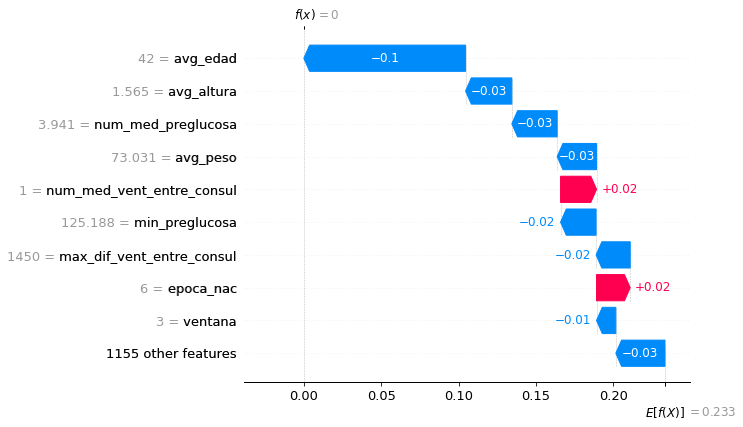

In [60]:
# train an XGBoost model
#X, y = shap.datasets.boston()
model = xgboost.XGBRegressor().fit(X_train, y_train)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X_train)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

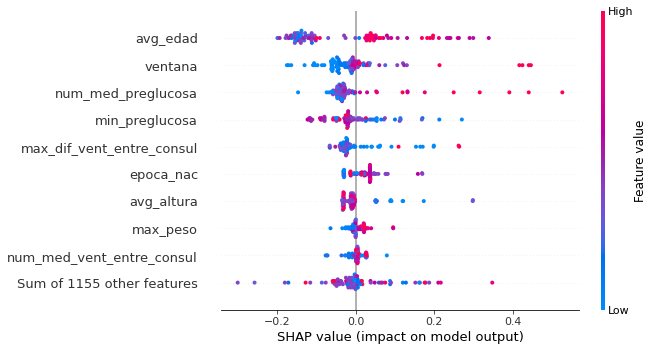

In [61]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

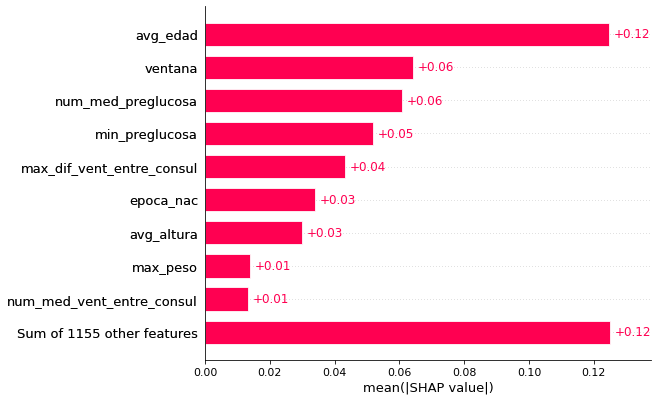

In [62]:
shap.plots.bar(shap_values)